# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.
 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = ("data/Mouse_metadata.csv")
study_results_path = ("data/Study_results.csv")

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
Pyma_df=pd.merge(study_results,mouse_metadata, on="Mouse ID", how="left")

# Display the data table for preview
Pyma_df.head()


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [2]:
# Checking the number of mice.
Mice_count=Pyma_df["Mouse ID"].nunique()
Mice_count

249

In [3]:
# Our data should be uniquely identified by Mouse ID and Timepoint

# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
Duplicate_Mice_count = Pyma_df.loc[Pyma_df.duplicated(subset=["Mouse ID","Timepoint"]),"Mouse ID"].unique()

Duplicate_Mice_count

array(['g989'], dtype=object)

In [4]:
# Optional: Get all the data for the duplicate mouse ID. 
Dup_mouse_id = Pyma_df.loc[Pyma_df["Mouse ID"]== "g989",:]
Dup_mouse_id

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
Neat_df = Pyma_df[Pyma_df["Mouse ID"].isin(Dup_mouse_id["Mouse ID"])==False]
Neat_df




,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,f932,0,45.000000,0,Ketapril,Male,15,29
2,g107,0,45.000000,0,Ketapril,Female,2,29
3,a457,0,45.000000,0,Ketapril,Female,11,30
4,c819,0,45.000000,0,Ketapril,Male,21,25
...,...,...,...,...,...,...,...,...
1888,r944,45,41.581521,2,Capomulin,Male,12,25
1889,u364,45,31.023923,3,Capomulin,Male,18,17
1890,p438,45,61.433892,1,Ceftamin,Female,11,26
1891,x773,45,58.634971,4,Placebo,Female,21,30


In [6]:
# Checking the number of mice in the clean DataFrame.
No_clean_Mice =Neat_df["Mouse ID"].nunique()
No_clean_Mice


248

## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
Summary_Table ={"Mean Tumor Volume","Median Tumor Volume","Tumor Volume Variance","Tumor Volume std.Dev","Tumor Volume SEM"}
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 

mean_regimen = Neat_df["Tumor Volume (mm3)"].groupby(Neat_df["Drug Regimen"]).mean()
median_regimen = Neat_df["Tumor Volume (mm3)"].groupby(Neat_df["Drug Regimen"]).median()
variance_regimen = Neat_df["Tumor Volume (mm3)"].groupby(Neat_df["Drug Regimen"]).var()
std_regimen = Neat_df["Tumor Volume (mm3)"].groupby(Neat_df["Drug Regimen"]).std()
sem_regimen = Neat_df["Tumor Volume (mm3)"].groupby(Neat_df["Drug Regimen"]).sem()
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.
Summary_Stat = pd.DataFrame({"Mean Tumor Volume":mean_regimen,
               "Median Tumor Volume":median_regimen,
               "Tumor Volume Variance":variance_regimen,
               "Tumor Volume std.Dev":std_regimen,
               "Tumor Volume SEM":sem_regimen})
Summary_Stat


,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume std.Dev,Tumor Volume SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [8]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

Advanced_method = Neat_df.groupby("Drug Regimen")
summary_stat2 = Advanced_method["Tumor Volume (mm3)"].agg(["mean","median","var","std","sem"])
summary_stat2
# Using the aggregation method, produce the same summary statistics in a single line


,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

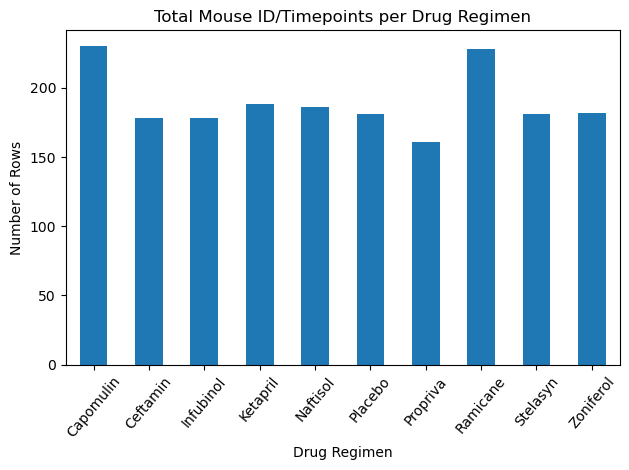

In [9]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.

total_numb = Pyma_df.groupby('Drug Regimen')['Mouse ID'].count()

Pandas_style = total_numb.plot.bar(x='Drug Regimen', y='Count', rot=50)

Pandas_style.set_title("Total Mouse ID/Timepoints per Drug Regimen")  
Pandas_style.set_ylabel("Number of Rows")

plt.tight_layout()
plt.show()

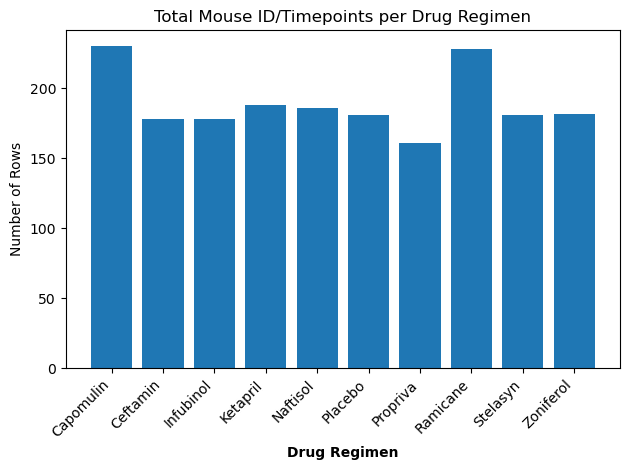

In [25]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.

total_num_rows =Pyma_df.groupby('Drug Regimen')['Mouse ID'].count().reset_index(name='Count')

x = total_num_rows['Drug Regimen']
y = total_num_rows['Count']

plt.bar(x, y)
plt.title("Total Mouse ID/Timepoints per Drug Regimen",rotation=0)
plt.xlabel("Drug Regimen", rotation=0,fontweight="bold")
plt.ylabel("Number of Rows", rotation=90)
plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.show()

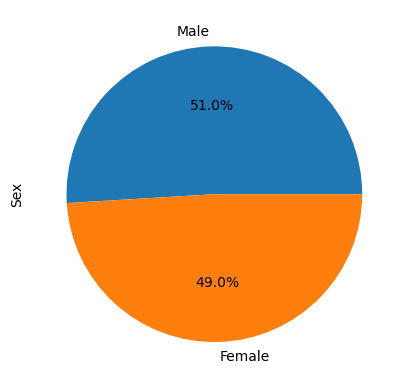

In [15]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
gender_counts = Neat_df['Sex'].value_counts()

labels = gender_counts.index
sizes = gender_counts.values 

fig, ax = plt.subplots()
ax.pie(sizes, labels=labels, autopct='%1.1f%%')
#ax.set_title("Sex")
plt.ylabel("Sex")


plt.show()

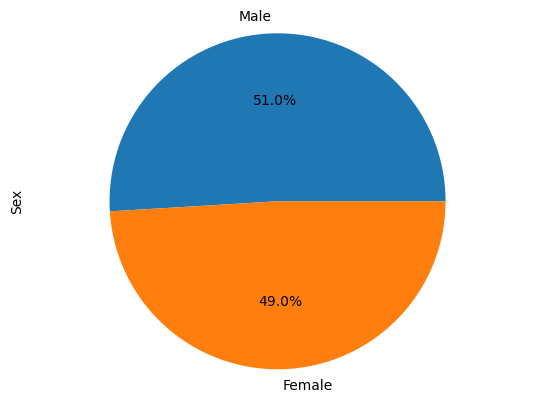

In [16]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
gender_counts =Neat_df['Sex'].value_counts()

labels = gender_counts.index
sizes = gender_counts.values

plt.pie(sizes, labels=labels, autopct='%1.1f%%')
plt.ylabel("Sex")

plt.axis('equal') 

plt.show()

## Quartiles, Outliers and Boxplots

In [17]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
#regimens = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']
#Treated_regimens = Pyma_df[Pyma_df['Drug Regimen'].isin(regimens)]

# Groupby Drug Regimen and Mouse ID
#grouped_regimens = Treated_regimens.groupby(['Drug Regimen', 'Mouse ID']) 

# Start by getting the last (greatest) timepoint for each mouse
tumor_vol = Neat_df.groupby(["Mouse ID"])['Timepoint'].max()
tumor_vol = tumor_vol.reset_index()



# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
Merge_data = tumor_vol.merge(Neat_df, on=("Mouse ID", "Timepoint"), how="left")


In [55]:
tumor_vol.head()


3     62.999356
21    45.000000
22    56.057749
25    55.742829
58    48.722078
Name: Tumor Volume (mm3), dtype: float64

In [20]:
# Put treatments into a list for for loop (and later for plot labels)
treatments_regimens = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

#regimen_list = []
#for regimen in regimens:
    #regimen_list.append(regimen)
    



# Create empty list to fill with tumor vol data (for plotting)
tumor_vol_data = []
for regimens in treatments_regimens:
    tumor_vol = Merge_data.loc[Merge_data['Drug Regimen'] == regimens, 'Tumor Volume (mm3)']
    tumor_vol_data.append(tumor_vol)
# Calculate the IQR and quantitatively determine if there are any potential outliers. 
    #q1 = tumor_vol['Tumor Volume (mm3)'].quantile(0.25)
    #q3 = tumor_vol['Tumor Volume (mm3)'].quantile(0.75)
    #iqr = q3 - q1
    quartiles = tumor_vol.quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)

# Calculate upper and lower bounds
#upper = q3 + 1.5*iqr
#lower = q1 - 1.5*iqr

# Find potential outliers
   # outliers = tumor_vol[(tumor_vol['Tumor Volume (mm3)'] >  upperq) | (tumor_vol['Tumor Volume (mm3)'] <  lowerq)]
    outliners = tumor_vol.loc[(tumor_vol < lower_bound) | (tumor_vol > upper_bound)]

    #print("IQR:", iqr)
    #print("Number of Potential Outliers:", len(outliers))
    print(f"{regimens} potential outliers: {outliners}")





    
    # Locate the rows which contain mice on each drug and get the tumor volumes

    
    # add subset 

    
    # Determine outliers using upper and lower bounds


Capomulin potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Ramicane potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Infubinol potential outliers: 31    36.321346
Name: Tumor Volume (mm3), dtype: float64
Ceftamin potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)


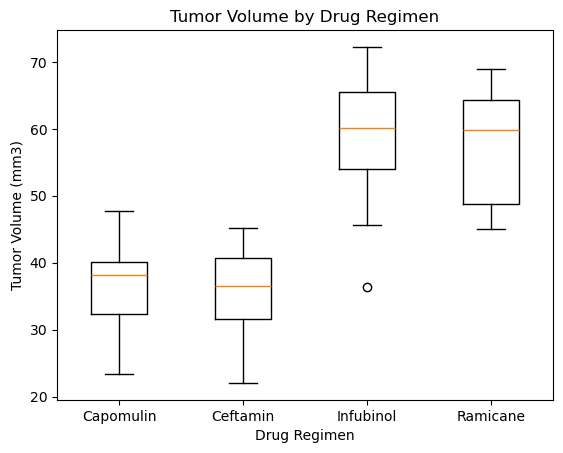

In [23]:
#Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
#Filter to one of the four regimens 

Regimens = ['Capomulin','Ceftamin','Infubinol','Ramicane']
fig1, ax1 = plt.subplots()
ax1.set_title('Tumor Volume by Drug Regimen')
ax1.set_ylabel('Tumor Volume (mm3)')
ax1.set_xlabel('Drug Regimen')
ax1.boxplot(tumor_vol_data, labels=Regimens)
plt.savefig("boxplot.png")
plt.show()


## Line and Scatter Plots

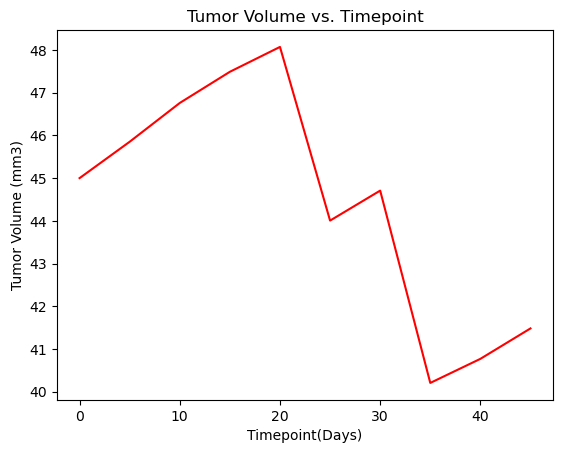

In [35]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
Cap_df = Pyma_df.loc[Pyma_df["Drug Regimen"] == "Capomulin"]
forline_df = Cap_df.loc[ Cap_df["Mouse ID"] == "l509"]

x_axisTP = forline_df ["Timepoint"]
y_axisTV = forline_df ["Tumor Volume (mm3)"]
plt.plot(x_axisTP, y_axisTV, markersize=12, color="red")
plt.title("Tumor Volume vs. Timepoint")
plt.xlabel("Timepoint(Days)")
plt.ylabel("Tumor Volume (mm3)") 
plt.savefig("linechart")  
plt.show()

In [52]:
Cap_df.head()

,Mouse ID,Timepoint_x,Tumor Volume (mm3)_x,Metastatic Sites_x,Drug Regimen_x,Sex_x,Age_months_x,Weight (g)_x,Timepoint_y,Tumor Volume (mm3)_y,Metastatic Sites_y,Drug Regimen_y,Sex_y,Age_months_y,Weight (g)_y
0,l509,0,45.0,0,Capomulin,Male,17,21,0,45.000000,0,Capomulin,Male,17,21
1,l509,0,45.0,0,Capomulin,Male,17,21,5,45.851193,0,Capomulin,Male,17,21
2,l509,0,45.0,0,Capomulin,Male,17,21,10,46.759074,0,Capomulin,Male,17,21
3,l509,0,45.0,0,Capomulin,Male,17,21,15,47.488599,1,Capomulin,Male,17,21
4,l509,0,45.0,0,Capomulin,Male,17,21,20,48.070452,2,Capomulin,Male,17,21


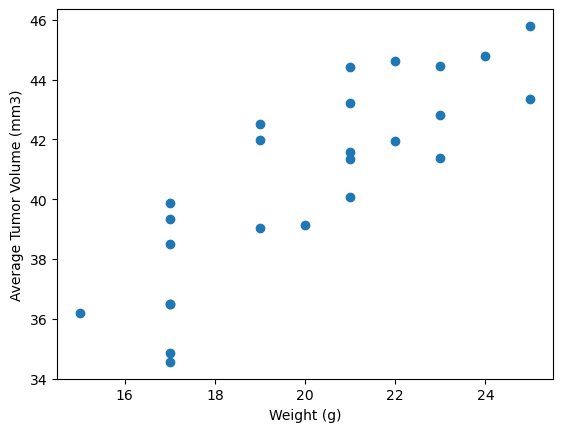

In [56]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen

Scatter_plot =Pyma_df[Pyma_df['Drug Regimen'] == 'Capomulin']
Scatter_plot=Scatter_plot.groupby(['Mouse ID'])[['Weight (g)', 'Tumor Volume (mm3)']].mean()
plt.scatter(Scatter_plot['Weight (g)'], Scatter_plot['Tumor Volume (mm3)'])
plt.xlabel('Weight (g)')
plt.ylabel("Average Tumor Volume (mm3)")
plt.savefig("scatter.png")
plt.show()



## Correlation and Regression

The correlation between mouse weight and average tumor volume is 0.84


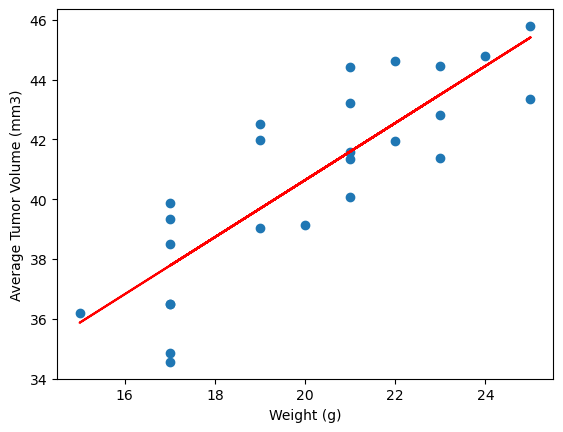

In [61]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
Correlatio_coe = round(st.pearsonr(Scatter_plot["Weight (g)"], Scatter_plot["Tumor Volume (mm3)"])[0],2)
print(f"The correlation between mouse weight and average tumor volume is {Correlatio_coe}")

model = st.linregress(Scatter_plot["Weight (g)"], Scatter_plot["Tumor Volume (mm3)"])
model
mslope = 0.9544396890241045
bintercept = 21.552160532685735
y_values = Scatter_plot["Weight (g)"] * mslope + bintercept
plt.scatter(Scatter_plot["Weight (g)"], Scatter_plot["Tumor Volume (mm3)"])
plt.plot(Scatter_plot["Weight (g)"], y_values, color="red")
plt.xlabel("Weight (g)")    
plt.ylabel("Average Tumor Volume (mm3)")
plt.savefig("Linear Regression.png")
plt.show()
